## Exercise01 - Playing Around with MNIST Fashion Image

Fashion-MNIST is a dataset of Zalando's article images (https://github.com/zalandoresearch/fashion-mnist) consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Each training and test example is assigned to one of the following labels:

| Label       | Image         |
| ----------- | ------------- |
| 0           | T-shirt/top
| 1           | Trouser
| 2           | Pullover
| 3           | Dress 
| 4           | Coat
| 5           | Sandal         
| 6           | Shirt
| 7           | Sneaker
| 8           | Bag
| 9           | Ankle Boot

**Acknowledgements**\
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist \
Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/


### 💾 The data: `MNIST Fashion Image`

### Tasks :

<div class="alert alert-block alert-danger">
    🚫 <b> Restriction:</b> Please refrain from using <b>ChatGPT</b> to complete this exercise, as doing so may hinder your learning experience.
</div>
    
1. Play around with MNIST Fashion Image Data, train some models with your favorite Algos. 

In [ ]:
# Start coding here...
# Add as many cells as you like...

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [3]:
df = pd.read_csv("data/fashion-mnist_train.csv")
df_test = pd.read_csv('data/fashion-mnist_test.csv')
print('train head')
display(df.head())
print('test head')
display(df_test.head())

train head


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test head


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.iloc[1:].values.max()

255

In [5]:
X_train = df.drop(columns="label").values/255
y_train = df.label.values

X_test = df_test.drop(columns='label').values/255
y_test = df_test.label.values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60000, 784), (10000, 784), (60000,), (10000,))

train sample


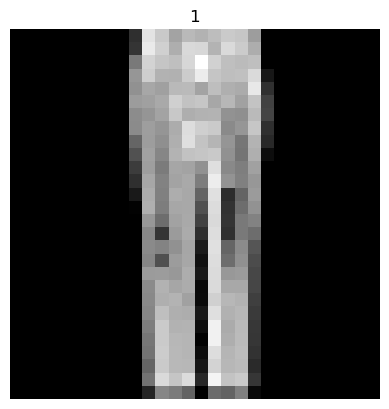

In [6]:
import matplotlib.pyplot as plt

N = len(X_train)
idx = np.random.choice(N)
img, label = X_train[idx], y_train[idx]

print('train sample')
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(label)
plt.axis('off');

test sample


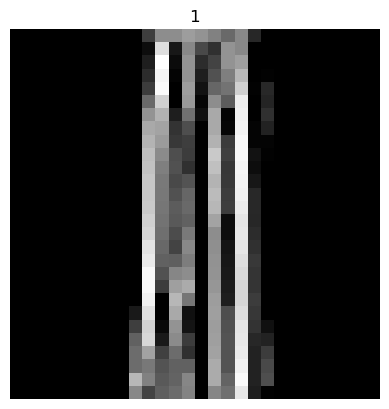

In [7]:
import matplotlib.pyplot as plt

N = len(X_test)
idx = np.random.choice(N)
img, label = X_test[idx], y_test[idx]

print('test sample')
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(label)
plt.axis('off');

In [8]:
## RandomForest

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}
0.9922333333333333 0.8817666666666666 0.8869


In [11]:
save_model(model.best_estimator_, "image_classy_rfc.pkl")

Model is pickled as model/image_classy_rfc.pkl


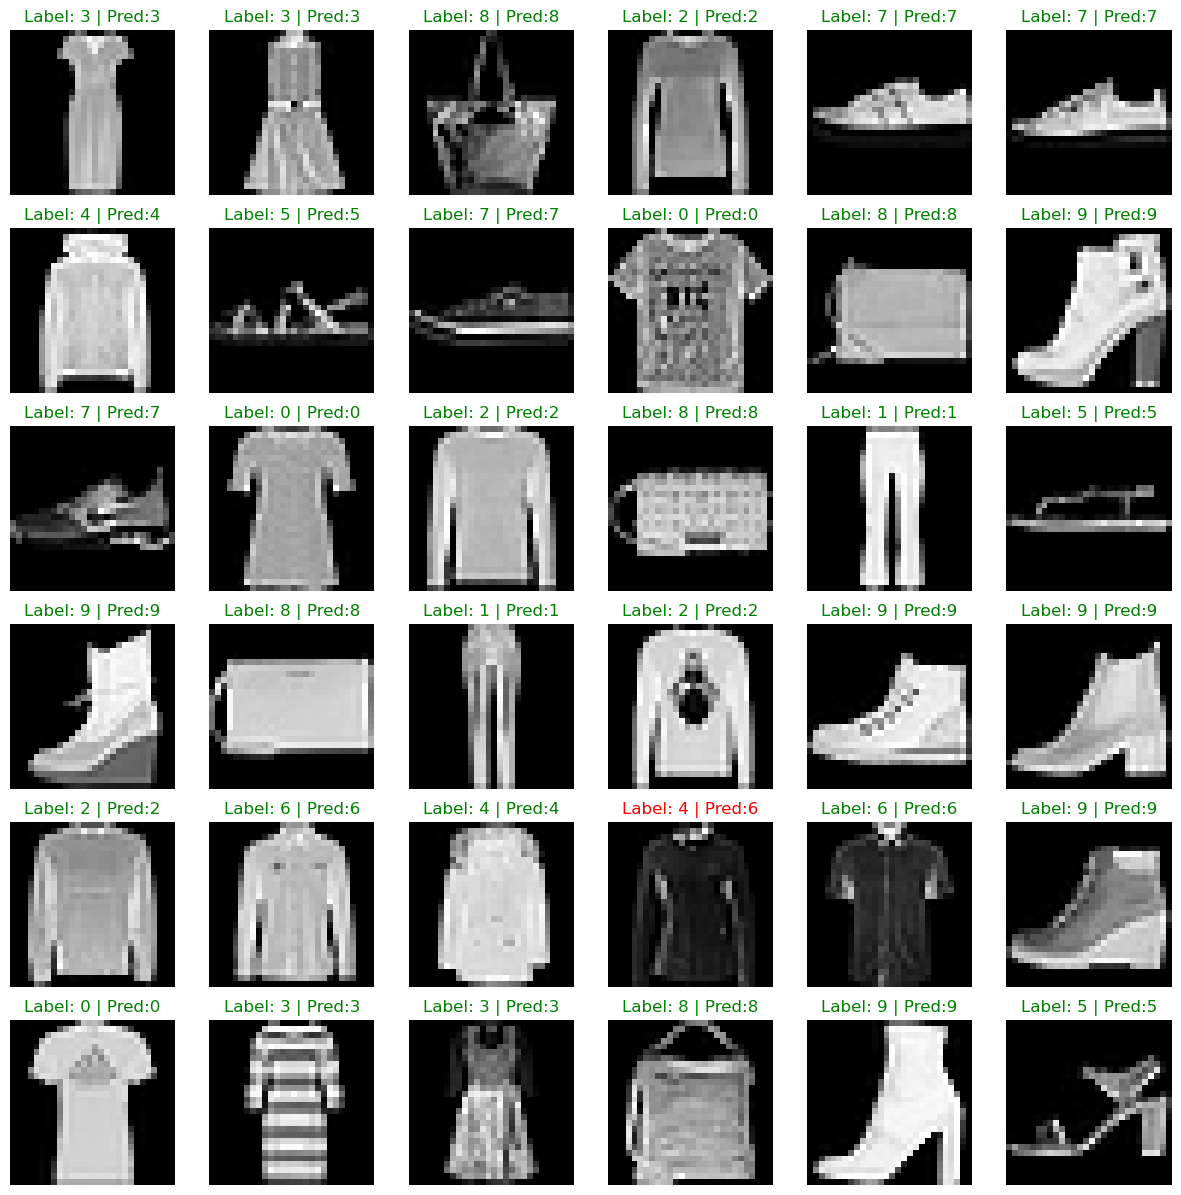

In [10]:
idx = np.random.choice(len(X_test), size=36, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6, 6, figsize = (15, 15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {'color':'g'} if label == pred else {'color': 'r'}
    
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {label} | Pred:{pred}", fontdict=font)
    ax.axis('off');

In [12]:
## SVM

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('algo', SVC(max_iter=1000))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\nurulhid\.conda\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 143.55363253973107, 'algo__gamma': 0.1507581708306848}
0.9891333333333333 0.8536166666666666 0.8669


In [13]:
save_model(model.best_estimator_, "image_classy_svc.pkl")

Model is pickled as model/image_classy_svc.pkl


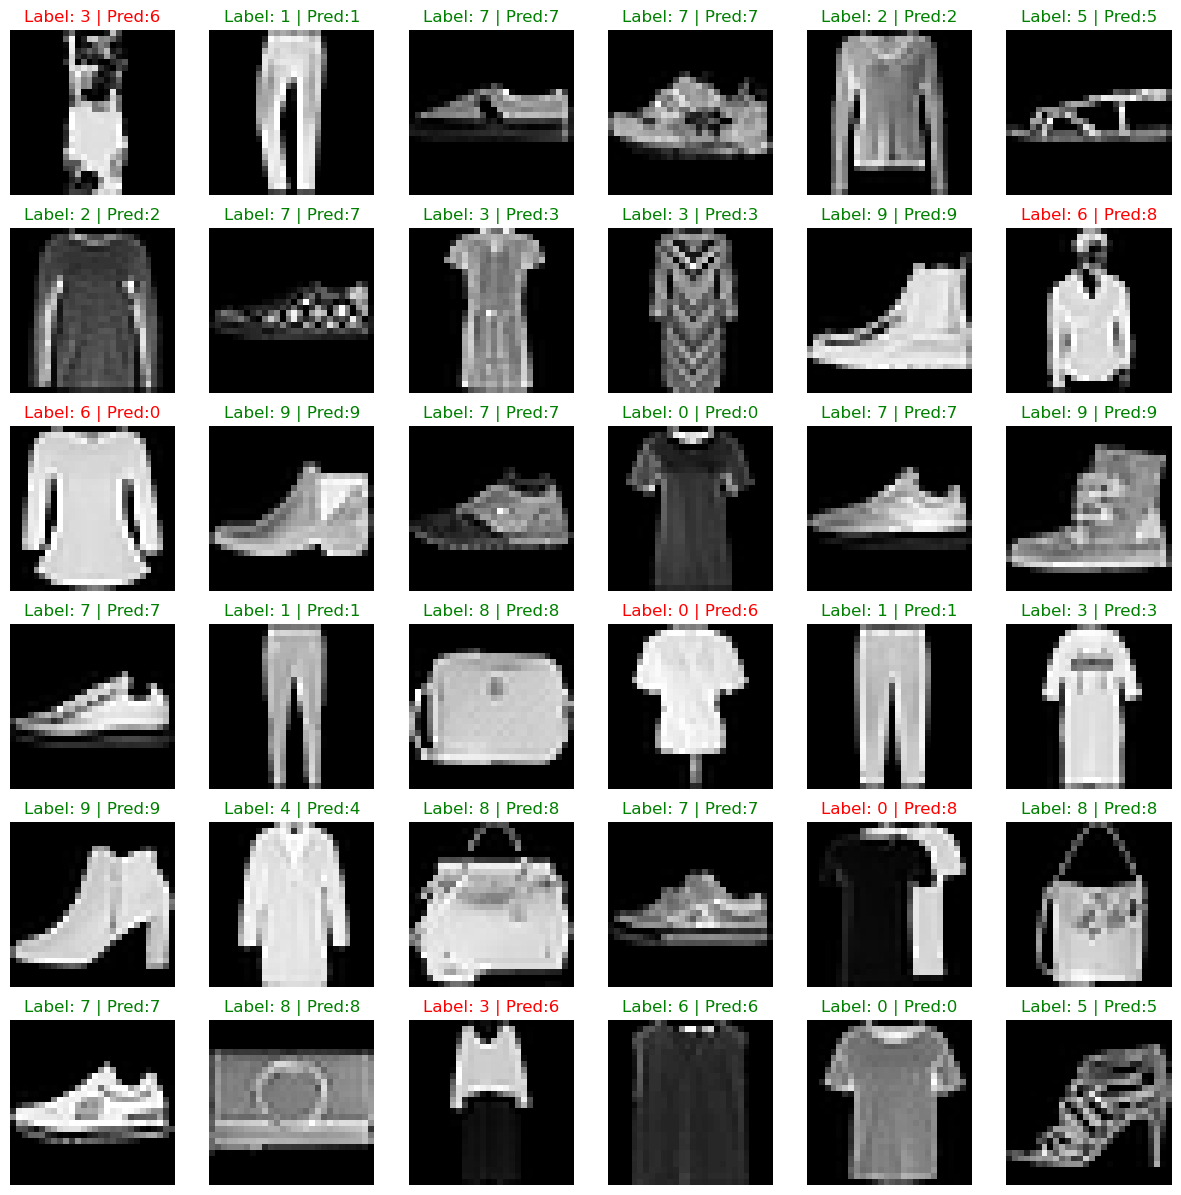

In [14]:
idx = np.random.choice(len(X_test), size=36, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6, 6, figsize = (15, 15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {'color':'g'} if label == pred else {'color': 'r'}
    
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {label} | Pred:{pred}", fontdict=font)
    ax.axis('off');